<a href="https://colab.research.google.com/github/NicKostii/UniProjects/blob/main/Car_prediction_Dataset_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Add, BatchNormalization, Dropout, ReLU, LeakyReLU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Nadam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import Huber

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/car_price_prediction_EDA_1 (2).csv")

In [ ]:
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Color,Airbags,Turbo,Drive wheels_Front,Drive wheels_Rear,Doors_4-5,Doors_>5,Wheel_Right-hand drive
0,13328,1399,5,20,2010,1,1,5,3.5,186005.0,6.0,1,5,12,0,0,0,1,0,0
1,16621,1018,8,27,2011,1,0,3,3.0,192000.0,6.0,0,3,8,0,0,0,1,0,0
2,8467,0,8,21,2006,9,0,3,1.3,200000.0,4.0,2,3,2,0,1,0,1,0,1
3,3607,862,8,23,2011,1,1,5,2.5,168966.0,4.0,1,4,0,0,0,0,1,0,0
4,11726,446,8,21,2014,9,1,3,1.3,91901.0,4.0,1,5,4,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16893,5802,1055,7,22,2013,8,1,0,3.5,107800.0,6.0,1,1,12,0,0,1,1,0,0
16894,8467,0,7,19,1999,6,1,6,2.0,300000.0,4.0,3,5,5,1,0,1,0,0,0
16895,15681,831,5,21,2011,8,1,3,2.4,161600.0,4.0,0,11,8,0,1,0,1,0,0
16896,26108,836,5,7,2010,1,1,0,2.0,116365.0,4.0,1,1,4,0,1,0,1,0,0


# New Section

In [ ]:
X = df.drop(columns=['Price'])
y = df['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# New Section

In [ ]:
inputs = Input(shape=(X_train.shape[1],))

x = Dense(512, kernel_regularizer=l2(0.001))(inputs)
x = LeakyReLU(alpha=0.1)(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(256, kernel_regularizer=l2(0.001))(x)
x = LeakyReLU(alpha=0.1)(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(128, kernel_regularizer=l2(0.001))(x)
x = LeakyReLU(alpha=0.1)(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(64, kernel_regularizer=l2(0.001))(x)
x = LeakyReLU(alpha=0.1)(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(32, kernel_regularizer=l2(0.001))(x)
x = LeakyReLU(alpha=0.1)(x)
x = BatchNormalization()(x)

outputs = Dense(1)(x)

model = Model(inputs, outputs)

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=300,
    batch_size=64,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/300
169/169 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 488805568.0000 - mae: 17198.9160 - val_loss: 499970400.0000 - val_mae: 17514.7715
Epoch 2/300
169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 504334592.0000 - mae: 17453.8438 - val_loss: 499411360.0000 - val_mae: 17507.9785
Epoch 3/300
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 485960064.0000 - mae: 17233.7246 - val_loss: 498560160.0000 - val_mae: 17496.8203
Epoch 4/300
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 484292832.0000 - mae: 17147.9219 - val_loss: 497199680.0000 - val_mae: 17479.3086
Epoch 5/300
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 487738080.0000 - mae: 17190.3906 - val_loss: 496005152.0000 - val_mae: 17458.3613
Epoch 6/300
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 486402272.0000 - mae: 17195.3613 - val_loss: 494684768.0000 - val_mae: 17435.1992
Epoch 7/300
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 488148416.0000 - mae: 17187.4941 - val_loss: 492726688.0000 - val_mae: 17406.8

In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error on Test Data: {test_mae}")

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 53039724.0000 - mae: 4531.2466
Mean Absolute Error on Test Data: 4452.7333984375


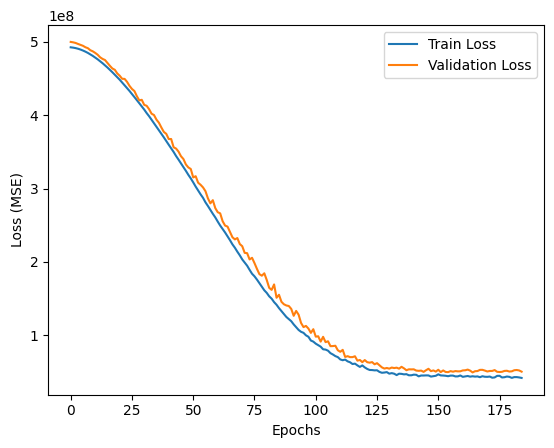

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test).flatten()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("=== Evaluation Metrics ===")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\n=== Sample Predictions ===")
print(results.head())

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
=== Evaluation Metrics ===
Mean Absolute Error (MAE): 4452.73
Mean Squared Error (MSE): 50597455.96
Root Mean Squared Error (RMSE): 7113.19
R² Score: 0.74
Mean Absolute Percentage Error (MAPE): 81.30%

=== Sample Predictions ===
       Actual     Predicted
980      8154   6696.774902
3978     1725   4831.523926
10137    1300   5869.180664
5764     3763   8369.353516
3584    21012  19449.994141


# New Section

In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
x = Dense(512, kernel_regularizer=l2(0.001))(inputs)
x = LeakyReLU(alpha=0.1)(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)





/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 19)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 256)                 │           5,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_39 (LeakyReLU)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_39               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_40 (LeakyReLU)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_40               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_41 (LeakyReLU)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_41               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_42 (LeakyReLU)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_42               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,305 (196.50 KB)

 Trainable params: 49,345 (192.75 KB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/300
169/169 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 482739136.0000 - mae: 17044.6523 - val_loss: 499902880.0000 - val_mae: 17511.9121
Epoch 2/300
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 501988896.0000 - mae: 17444.5645 - val_loss: 499396160.0000 - val_mae: 17507.1328
Epoch 3/300
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 497392480.0000 - mae: 17355.0488 - val_loss: 498497728.0000 - val_mae: 17494.9863
Epoch 4/300
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 485322784.0000 - mae: 17239.9023 - val_loss: 497399584.0000 - val_mae: 17478.3379
Epoch 5/300
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 491753536.0000 - mae: 17319.9336 - val_loss: 496198208.0000 - val_mae: 17458.9648
Epoch 6/300
169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 483962752.0000 - mae: 17149.5684 - val_loss: 494794912.0000 - val_mae: 17434.4551
Epoch 7/300
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 500693568.0000 - mae: 17423.1445 - val_loss: 493127328.0000 - val_mae: 17410.070

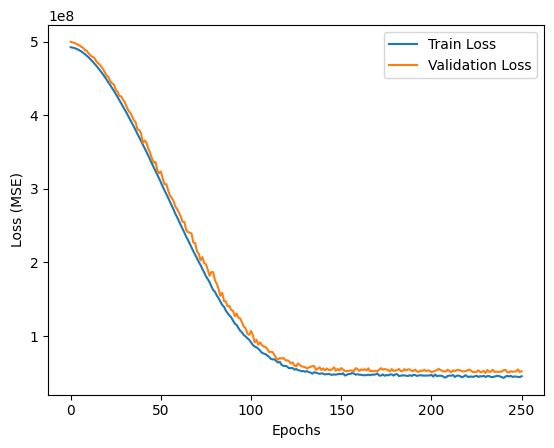

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
=== Evaluation Metrics ===
Mean Absolute Error (MAE): 4533.91
Mean Squared Error (MSE): 49976544.55
Root Mean Squared Error (RMSE): 7069.41
R² Score: 0.75
Mean Absolute Percentage Error (MAPE): 87.70%

=== Sample Predictions ===
   Actual     Predicted
0    8154   5939.767090
1    1725   4537.410645
2    1300   4934.173340
3    3763   8159.959473
4   21012  19444.693359


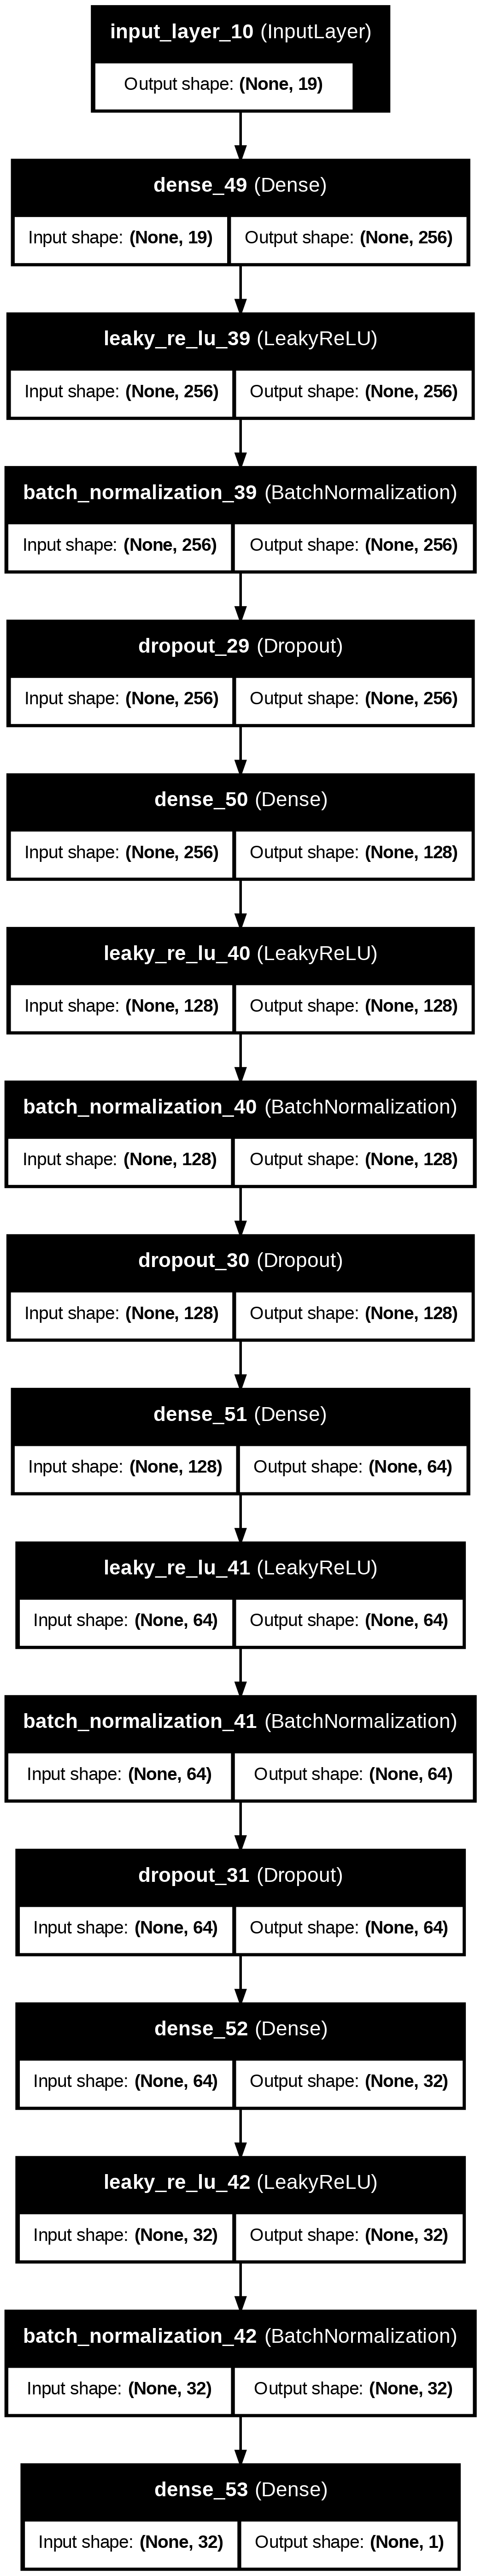

In [ ]:
inputs = Input(shape=(X_train.shape[1],))
x = Dense(256, kernel_regularizer=l2(0.001))(inputs)
x = LeakyReLU(alpha=0.1)(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(128, kernel_regularizer=l2(0.001))(x)
x = LeakyReLU(alpha=0.1)(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(64, kernel_regularizer=l2(0.001))(x)
x = LeakyReLU(alpha=0.1)(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(32, kernel_regularizer=l2(0.001))(x)
x = LeakyReLU(alpha=0.1)(x)
x = BatchNormalization()(x)

outputs = Dense(1)(x)

model = Model(inputs, outputs)

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=300,
    batch_size=64,
    verbose=1,
    callbacks=[early_stopping]
)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

y_pred = model.predict(X_test).flatten()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("=== Evaluation Metrics ===")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\n=== Sample Predictions ===")
print(results.head())

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

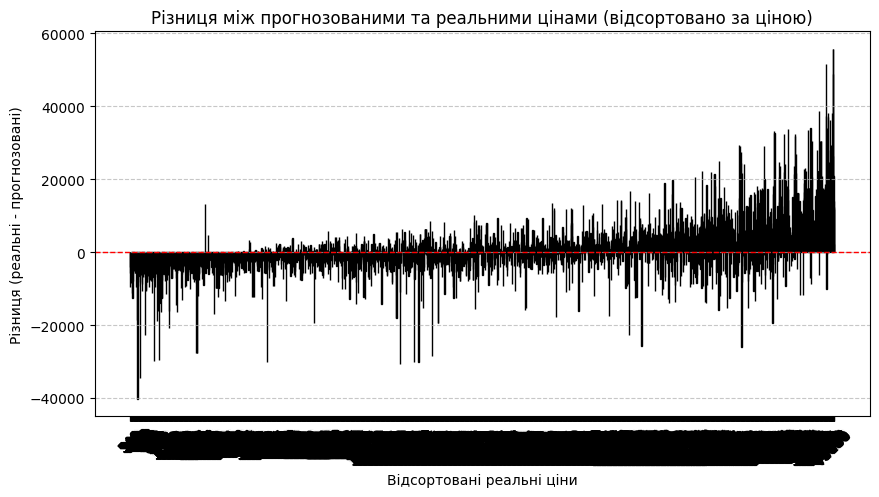

In [ ]:
# Дані (перетворення у numpy, якщо вони pandas.Series або DataFrame)
y_test = np.array(y_test)  # Якщо y_test є pandas.Series
y_pred = np.array(y_pred)  # Якщо y_pred є pandas.Series

# Обчислення різниці
difference = y_test - y_pred

# Сортування за реальними цінами
sorted_indices = np.argsort(y_test)  # отримуємо індекси для сортування
y_test_sorted = y_test[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]
difference_sorted = difference[sorted_indices]

# Побудова графіка
plt.figure(figsize=(10, 5))
plt.bar(range(len(y_test_sorted)), difference_sorted, color='skyblue', edgecolor='black')

# Налаштування графіка
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # лінія нуля
plt.title("Різниця між прогнозованими та реальними цінами (відсортовано за ціною)")
plt.xlabel("Відсортовані реальні ціни")
plt.ylabel("Різниця (реальні - прогнозовані)")
plt.xticks(range(len(y_test_sorted)), labels=[f"{price}" for price in y_test_sorted], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()